In [1]:
#Import necessary libraries
import nltk
nltk.download('brown')
from nltk.corpus import brown
import itertools
import string
import math
import pandas as pd
import random
import collections



[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Golsa\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


**(a) Write a code from the scratch that learns unigram and bigram models on the training data as Python dictionaries. Report the perplexity of your unigram and bigram models on the both training data and test data.**

In [2]:
#Split the dataset
dataset = [sentence for sentence in brown.sents()]
dataset_train = dataset[0:40138]
dataset_vald = dataset[40139:45873]
dataset_test = dataset[45874:]

In [3]:
#print train, test and validation 
print(len(dataset))
print(len(dataset_train))
print(len(dataset_vald))
print(len(dataset_test))

57340
40138
5734
11466


In [4]:
# Total number of tokens in training data(unigram )
d_t = list(itertools.chain.from_iterable(dataset_train))
total_dtrain = len(d_t)
print("Total corpus for training set : ", total_dtrain)

Total corpus for training set :  890689


In [5]:
#process data (remove punctuation, empty strings,...)
def pre_process_data(sents):
    for i in range(len(sents)):
        # remove punctuations
        sents[i] = [''.join(c for c in s if c not in string.punctuation) for s in sents[i]]
        # empty strings removing
        sents[i] = [s for s in sents[i] if s] 
         # lower case
        sents[i] = [word.lower() for word in sents[i]]
         # Append </s> at the end of each sentence in the corpus
        sents[i] += ['</s>', '</s>']
         # Append <s> at the beginning of each sentence in the corpus
        sents[i].insert(0, '<s>') 
        # Append <s> at the beginning of each sentence in the corpus
        sents[i].insert(0, '<s>')  
    print("No of sentences in Corpus: "+str(len(sents)))
    return sents

In [6]:
#print number of sentence
dataset_train = pre_process_data(dataset_train)

No of sentences in Corpus: 40138


In [7]:
#total number of vocab
def vocab(dataset):
    ds = set(itertools.chain.from_iterable(dataset))
    # remove <s> and </s> 
    ds.remove('<s>')
    ds.remove('</s>')
    ds = list(ds)
    ds.append('<s>')
    ds.append('</s>')
    return ds

dtrn_vocab = vocab(dataset_train)
#print tot vocab
dtrn_vocab_size = len(dtrn_vocab)
print("Vocabulary Size of training data: ", dtrn_vocab_size)

Vocabulary Size of training data:  42235


In [8]:
def unique_word_func(dataset):
    # change the nested list to one single list
    collection_words = list(itertools.chain.from_iterable(dataset)) 
     # No of words in the corpus excluding <s> and </s>.
    corpus_word_count = 0
    #count the no. of times a word repeats in the corpus
    count = {}
    for word in collection_words:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1
        if word != '<s>' and word != '</s>':
             corpus_word_count +=1
    # number of unique words
    unique_word_count = len(count) 
    print("Number of unique words in corpus : "+ str(unique_word_count))
    print("Number of words in corpus: "+ str(corpus_word_count))
    return count
#print unigram freq
unigram_freq = unique_word_func(dataset_train)

Number of unique words in corpus : 42235
Number of words in corpus: 785353


Unigram Model

In [9]:
#Unigram Mode
def unigram_model_prob(word_freq, total_tokens):
    unigram = {}
    for w in word_freq:
        unigram[w] = word_freq[w] /total_tokens
    return unigram
    
#unigram_probabilities
unigram_probabilities = unigram_model_prob(unigram_freq, total_dtrain)

Bigram Model

In [10]:
#Calculate the bigram frequencies 
def bigram_model_freq(lines):
    bigram_frequencies = dict()
    for sentence in lines:
        given_word = None
        for word in sentence:
            if given_word != None:
                bigram_frequencies[(given_word, word)] = bigram_frequencies.get((given_word, word),0) + 1
            given_word = word    
    return bigram_frequencies

#bigram freq
bigram_freq = bigram_model_freq(dataset_train)


In [11]:
# Calculating bigram probability
def bigram_model_prob(bigram_freq, unique_freq, denom = 0, add_l=False):
    bigram_prob = dict() 
    for key in bigram_freq:
        numerator = bigram_freq.get(key)
        if add_l:
            denominator = unique_freq.get(key[0])+denom
        else:
            denominator = unique_freq.get(key[0]) # get the frequency of "given word" in the corpus.
        if (numerator == 0 or denominator== 0):
            bigram_prob[key] = 0
        else:
            bigram_prob[key] = float(numerator)/float(denominator)
    return bigram_prob
#bigram prob
bigram_probabilities = bigram_model_prob(bigram_freq,unigram_freq)


Perplexity

In [12]:
#Preproce test and validation data
d_trn = list(itertools.chain.from_iterable(dataset_train))
d_tst = pre_process_data(dataset_test)
d_tst = list(itertools.chain.from_iterable(d_tst))
d_val = pre_process_data(dataset_vald)
d_val = list(itertools.chain.from_iterable(d_val))

No of sentences in Corpus: 11466
No of sentences in Corpus: 5734


In [13]:
# perplexity calcuation
def perplexity(ngrams, model):
    perplexity = 0
    N = 0
    for word in ngrams:
        N += 1
        if(word in model):
            perplexity = perplexity + math.log(model[word],2)        
    perplexity = -(perplexity * 1/N )
    return pow(2,perplexity)

In [14]:
##Perplexity of unigram for training,val and test data

#Perplexity of unigram in training data
uni_train_perplexity = perplexity(d_trn, unigram_probabilities)
uni_train_perplexity
print(f'Unigram Perplexity on training set: {uni_train_perplexity}')

#Perplexity of unigram validation data
uni_val_perplexity = perplexity(d_val, unigram_probabilities)
uni_val_perplexity
print(f'Unigram Perplexity on Val set: {uni_val_perplexity}')

#Perplexity of unigram test data
uni_test_perplexity = perplexity(d_tst, unigram_probabilities)
uni_test_perplexity
print(f'Unigram Perplexity on test set: {uni_test_perplexity}')


Unigram Perplexity on training set: 730.130991189557
Unigram Perplexity on Val set: 378.65046453661864
Unigram Perplexity on test set: 377.645417328154


In [15]:
##Perplexity of bigram training,val and test data

#bigrams for training data
bigrams_trn = list(zip(*[d_trn[i:] for i in range(2)]))
bi_train_perplexity = perplexity(bigrams_trn, bigram_probabilities)
bi_train_perplexity
print(f'Bigram Perplexity on training set: {bi_train_perplexity}')


#bigrams for validation data
bigrams_val = list(zip(*[d_val[i:] for i in range(2)]))
bi_val_perplexity = perplexity(bigrams_val, bigram_probabilities)
bi_val_perplexity
print(f'Bigram Perplexity on val set: {bi_val_perplexity}')


#bigrams for test data
bigrams_tst = list(zip(*[d_tst[i:] for i in range(2)]))
bi_tst_perplexity = perplexity(bigrams_tst, bigram_probabilities)
bi_tst_perplexity
print(f'Bigram Perplexity on test set: {bi_tst_perplexity}')


Bigram Perplexity on training set: 49.87132625761988
Bigram Perplexity on val set: 12.276443909371919
Bigram Perplexity on test set: 11.836979146604865


**Question (a) Summary:** 

Unigram Perplexity on training set: 730.130991189557

Unigram Perplexity on test set: 377.645417328154



Bigram Perplexity on training set: 49.87132625761988

Bigram Perplexity on test set: 11.836979146604865



**(b) Implement add-λ smoothing method. With varying λ values. Draw a curve that measures
your perplexity change over different λ values on the developing data.**

In [16]:
#Function for smoothened frequencies
def add_smoothing(l, freq):
    s_freq = dict()
    #s_prob = dict()
    for key in freq.keys():
        if freq.get(key) == None:
            s_freq[key] = l
        else:
            s_freq[key] = freq.get(key)+l
    return s_freq



In [17]:
#calculaye perplexity for different lambda values
lamda = [ 0.001, 0.01, 0.1, 1, 1.5, 2, 5, 10] 

sfreq_bi = dict()
sfreq_uni = dict()
df = pd.DataFrame(columns=['lambda_value', 'perplexity_unigram', 'perplexity_bigram'])

for l in lamda:
    #  smoothened frequencies
    sfreq_uni = add_smoothing(l, unigram_freq) 
    sfreq_bi = add_smoothing(l, bigram_freq) 

    # smoothened freq prob
    sf_uni_prob = unigram_model_prob(sfreq_uni, total_dtrain + l * dtrn_vocab_size)
    sf_bi_prob = bigram_model_prob(sfreq_bi, sfreq_uni, l * dtrn_vocab_size, add_l=True)

    # Perplexity on val data
    sf_uni_perp = perplexity(d_val, sf_uni_prob)
    sf_bi_perp = perplexity(bigrams_val, sf_bi_prob)

    # lambda and perplexity values
    df = df.append({'lambda_value': l, 'perplexity_unigram': sf_uni_perp, 'perplexity_bigram': sf_bi_perp}, ignore_index=True)

In [18]:
df

,lambda_value,perplexity_unigram,perplexity_bigram
0,0.001,378.655185,13.537346
1,0.010,378.697942,17.406994
2,0.100,379.151249,29.475438
3,1.000,385.342376,66.497294
4,1.500,389.527800,78.349715
5,2.000,394.005223,88.176717
6,5.000,423.668186,128.584087
7,10.000,475.944238,169.229439


<AxesSubplot:title={'center':'Perplexity of Unigram Model with different values of lambda'}, xlabel='Lambda', ylabel='Perplexity'>

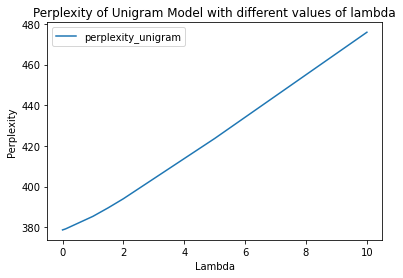

In [19]:
# Graph of lambda vs. perplexity (unigram model)

df.plot(x='lambda_value', y='perplexity_unigram', xlabel= 'Lambda', ylabel = 'Perplexity', title = "Perplexity of Unigram Model with different values of lambda")

<AxesSubplot:title={'center':'Perplexity of Bigram Model with different values of lambda'}, xlabel='Lambda', ylabel='Perplexity'>

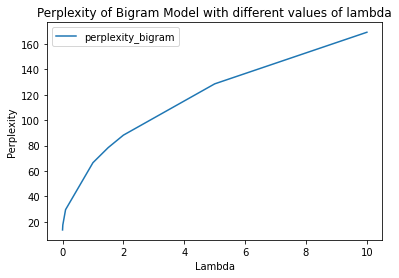

In [20]:
# graph different values of lambda and perplexity (bigram model)

df.plot(x='lambda_value', y='perplexity_bigram', xlabel= 'Lambda', ylabel = 'Perplexity', title = "Perplexity of Bigram Model with different values of lambda")

**(c) Pick the best lambda value(s) and train again your unigram and bigram models on training data + developing data. Report new perplexity of your unigram and bigram models on the test data.**

We will use  lambda value as 0.001 for both model.

In [21]:
# combine training and validation data
d_trn_val = dataset[0:45873]

# Total number of tokens in dataset for unigram 
tok_trn_val = list(itertools.chain.from_iterable(d_trn_val))
tot_tok_trn_val = len(tok_trn_val)
print("Total corpus before preprocessing : ", tot_tok_trn_val)

#Preprocess data
d_trnval_pre = pre_process_data(d_trn_val)
data_trn_val = list(itertools.chain.from_iterable(d_trnval_pre))

#Vocabulary size
dtrnval_vocab = vocab(d_trn_val)
dtrnval_vocab_size = len(dtrnval_vocab)
print("Vocabulary Size : ", dtrnval_vocab_size)


Total corpus before preprocessing :  979662
No of sentences in Corpus: 45873
Vocabulary Size :  44143


In [22]:
# calculate the Unigram and Bigram frequencies for the new data
nds_unigram_freq = unique_word_func(d_trnval_pre)
nds_bigram_freq = bigram_model_freq(d_trnval_pre)

#Bigrams for new dataset
bigrams_trnval = list(zip(*[data_trn_val[i:] for i in range(2)]))

Number of unique words in corpus : 44143
Number of words in corpus: 860874


In [23]:
#Calculating smoothened frequencies
suni_f = add_smoothing(0.001, nds_unigram_freq)
sbi_f = add_smoothing(0.001, nds_bigram_freq)

#Probablities for smoothened freq
suni_prob = unigram_model_prob(suni_f, tot_tok_trn_val + 0.001 * dtrnval_vocab_size)
sbi_prob = bigram_model_prob(sbi_f,suni_f, 0.001 * dtrnval_vocab_size)


#Perplexity of the model on validation data
suni_perp = perplexity(data_trn_val, suni_prob)
sbi_perp = perplexity(bigrams_trnval, sbi_prob)


In [24]:
#print 
print("Perplexity of unigram model using lambda value 0.001 : ",suni_perp )
print("Perplexity of bigram model using lambda value 0.001 : ",sbi_perp )

Perplexity of unigram model using lambda value 0.001 :  707.9696504676833
Perplexity of bigram model using lambda value 0.001 :  50.5476244749373


In [25]:
# Perplexity for test data
#unigram 
uni_test_perp = perplexity(d_tst, suni_prob)

#bigrams
bi_val_perp = perplexity(bigrams_tst, sbi_prob)

#print
print("Perplexity of unigram model on test data: ", uni_test_perp)
print("Perplexity of bigram model on test data: ", bi_val_perp)

Perplexity of unigram model on test data:  370.5289096515584
Perplexity of bigram model on test data:  12.835516421926783


**Summary question (c)**

Perplexity of unigram model on test data: 1.3150479657829957

Perplexity of bigram model on test data: 12.835516421926783


**(d) Generate random sentences based on the unigram and bigram language models from part
(c). Report 5 sentences per model by sampling words from each model continuously until
meeting the stop symbol ⟨/s⟩.**


In [26]:
#This function builds context information and counts  
#the occurrences of n-grams in a given dataset
def context_counter(freq, n):
    context = {}
    ngram_counter = {}

    for ngram in freq.keys():
        if ngram in ngram_counter:
            ngram_counter[ngram] += 1.0
        else:
            ngram_counter[ngram] = 1.0
        if n == 2:
            prev_words, target_word = ngram
        elif n == 3:
            prev_words = ngram[0:2]
            target_word = ngram[2]
        if prev_words in context:
            context[prev_words].append(target_word)
        else:
            context[prev_words] = [target_word]
            
    return context, ngram_counter

In [27]:
# this function to randomly choose word based on context 
#of training data
def generate_random_token(word, prob, context, n):
    r = random.random()
    map_to_probs = {}
    if n > 2:
        token_of_interest = context[word] 
        for token in token_of_interest:
            ngram = word + (token,)
            map_to_probs[token] = prob.get(ngram)
    else:
        for i in word:
            token_of_interest = context[i] 
            given_word = i
        for token in token_of_interest:
            map_to_probs[token] = prob.get((given_word, token))
    summ = 0
    for token in sorted(map_to_probs):
        summ += map_to_probs[token]
        if summ > r:
            return token


In [28]:
#function to generate random text
def generate_random_text(n, prob, context):
    context_queue = (n-1) * ['<s>']
    result = []
    obj = ""
    while obj != '</s>':
        if n > 2:
            obj = generate_random_token(tuple(context_queue), prob, context, n)
        else:
            obj = generate_random_token(context_queue, prob, context, n)
        if (obj != '</s>' and obj != '<s>'):
            result.append(obj)
        if n > 1:
            context_queue.pop(0)
            context_queue.append(obj)
    return ' '.join(result)


In [29]:
#Generate 5 sentences (bigram)
context_sbi, counter_sbi = context_counter(sbi_f, 2)

for i in range(1,6):
    sentence = generate_random_text(2, sbi_prob, context_sbi)
    print(i,") ", sentence)


1 )  in the provisional government has largely undermined our settlements the process to shelleys pensioner and electronic switches may be exaggerated ideas which manufactured boat is being fitted with him as outlined above all cases which 03 wt as for her first if it it possible that the north american camera and mission actually controls or dyed hair and jean baptiste reinhardt the vertical direction and a process by acknowledged and then the entire united states of fully this latter
2 )  a panoramic look in comparison with his case and occasionally used to follow
3 )  the beatnik like a sneer the old south
4 )  there had once benjamin ford commission has plunged into a generation of the animal insect repellent and even after more on his ledger there were fretting and ruthless to appraise realistically long since their roots cool she would not attempted nothing at his hat drawn from the skopas house
5 )  quakers and dartmouth student who are protected with this textform list is placi

In [30]:
# Unigram

# For Unigram

def next(dict):
    total = 0
    for key, value in dict.items():
        total += float(value)
    random_probability = random.uniform(0, total)       # create random number
    temp = 0
    for word, probability in dict.items():
        if temp + float(probability) > random_probability: # When you reach the random number take the word.
            return word
        temp += float(probability)  

def generate_sent_uni(dict):
    sentence =[]
    generated_word = ''
    while (generated_word != '</s>' and generated_word != '<s>'):
      generated_word = next(dict)
      if (generated_word != '</s>' and generated_word != '<s>'):
        sentence.append(generated_word)
    
    return ' '.join(sentence)



In [31]:
#Generate 5 sentences for unigram
for i in range(1,6):
  sentence = generate_sent_uni(suni_prob)
  print(i,") ", sentence)



1 )  aureomycin with would
2 )  mondrian factor suffocating
3 )  each the
4 )  suffered cholesterol been in and private or 1 two
5 )  stand well only jewelry future of resolve lb two firm to would grudges


**e) Choose at least one additional extension to implement. The available options are trigram, Good-Turing smoothing, interpolation method, and creative handling of unknown
words. Verify quantitative improvement by measuring 1) the perplexity on test data; and
qualitative improvement by retrying 2) the random sentence generation in part (d).**

### Tri-Gram Model

In [32]:
#calculate the trigram freq
def trigram_model_freq(lines):
    trigram_frequencies = dict()
    
    for sentence in lines:
        prev_given_word = None
        given_word = None
        
        for word in sentence:
            if prev_given_word is not None and given_word is not None:
                trigram = (prev_given_word, given_word, word)
                trigram_frequencies[trigram] = trigram_frequencies.get(trigram, 0) + 1
            
            prev_given_word = given_word
            given_word = word
    
    return trigram_frequencies



In [33]:
tri_f = trigram_model_freq(d_trnval_pre)

In [34]:
#Calculate trigram prob
def trigram_model_prob(tri_freq, bi_freq, denom=0, smooth=False):
    trigram_model = {}
    for trigram, count in tri_freq.items():
        bigram = trigram[:2]
        if smooth:
            trigram_model[trigram] = count / (bi_freq.get(bigram, 0) + denom)
        else:
            trigram_model[trigram] = count / bi_freq.get(bigram, 1)  # Add-one smoothing

    return trigram_model


In [35]:
tri_prob = trigram_model_prob(tri_f, nds_bigram_freq)

In [36]:
# Perplexity of Trigram model on training data
trigrams_trn = list(zip(*[data_trn_val[i:] for i in range(3)]))
tri_trn_perp = perplexity(trigrams_trn, tri_prob)
tri_trn_perp


5.190404218992427

In [37]:
# Perplexity of Trigram model on test data
trigrams_tst = list(zip(*[d_tst[i:] for i in range(3)]))
tri_tst_perp = perplexity(trigrams_tst, tri_prob)
tri_tst_perp

2.1930950498971473

**Apply Lambda smoothing for the model**

In [42]:
# Add-lambda Smoothing for Trigram Model
lamda = [ 0.001, 0.01, 0.1, 1, 1.5, 2, 5, 10] 

sfreq_tri= dict()
df_tri = pd.DataFrame(columns=['lambda_value', 'perplexity_trigram'])

for l in lamda:
    # Calculating smoothened frequencies for trigrams
    sfreq_tri = add_smoothing(l, tri_f)
    #sfreq_bi = add_smoothing(l, nds_bigram_freq)

    # Probabilities for smoothened trigrams
    sf_tri_prob = trigram_model_prob(sfreq_tri, sfreq_bi, l * dtrnval_vocab_size, smooth= True)

    # Perplexity of the trigram model on validation data
    sf_tri_perp = perplexity(trigrams_trn, sf_tri_prob)

    # Collecting lambda and perplexity values
    df_tri = df_tri.append({'lambda_value': l, 'perplexity_trigram': sf_tri_perp}, ignore_index=True)


<AxesSubplot:title={'center':'Perplexity of Trigram Model based on lambda values'}, xlabel='lambda_value', ylabel='Perplexity'>

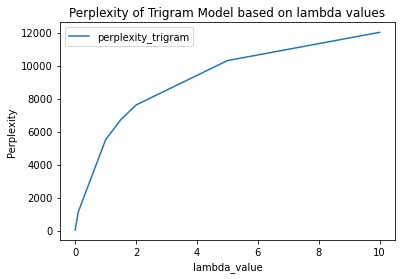

In [44]:
# plotting the graph for different values of lambda and their respective perplexity for unigram model

df_tri.plot(x='lambda_value', y='perplexity_trigram', xlabel= 'lambda_value', ylabel = 'Perplexity', title = "Perplexity of Trigram Model based on lambda values")

In [45]:
#Calculating smoothened freq
sbi_f = add_smoothing(0.001, nds_bigram_freq)
stri_f = add_smoothing(0.001,tri_f)

#Probablities for smoothened freq
stri_prob = trigram_model_prob(stri_f, sbi_f, 0.001 * dtrnval_vocab_size, smooth=True)

#Perplexity of the model on training data
sf_tri_trn_perp = perplexity(trigrams_trn, stri_prob)
print("Perplexity of train data : ", sf_tri_trn_perp)

Perplexity of train data :  36.057895164966155


In [46]:
sf_tri_tst_perp = perplexity(trigrams_tst, stri_prob)
print("Perplexity of test data : ",tri_tst_perp)

Perplexity of test data :  2.1930950498971473


In [48]:
def generate_textt(n, prob, context):
    context_queue = ['<s>'] * (n - 1)
    result = []
    obj = ""

    while obj != '</s>' and obj != '<s>':
        if n > 2:
            obj = generate_random_token(tuple(context_queue), prob, context, n)
        else:
            obj = generate_random_token(context_queue, prob, context, n)
        if obj is not None:
            if obj != '</s>' and obj != '<s>':
                result.append(obj)
            if n > 1:
                context_queue.pop(0)
                context_queue.append(obj)

    return ' '.join(result)

# Generate 5 sentences for trigram
context_stri, counter_stri = context_counter(tri_f, 3)

for i in range(1,6):
    sentence = generate_textt(3, tri_prob, context_stri)
    print(i,") ", sentence)


1 )  hengesbach has been and is in essence a fragile precious little piece of wax to marble in tactile quality and justice
2 )  develop wildlife openings food patches and game management practices there is only seen by some as thermostatics to the other charge was nolle prossed
3 )  as my wife could drive us into temptation for a given commercial organic active
4 )  mr skyros too smart a fellow who has catalogued for easy reference and has come to dominate childrens clothing taking the visitor from the theatre of marcellus give you a couple more cops to hold them until the morphophonemics is worked out at once
5 )  i say chantey
